- Reduces Dimensions by the rows
- Not good for Fitting the model
- Best for understanding and interpretability

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
telco = pd.read_csv('Telco.csv')

In [4]:
telco.sample(10)

,Calls,Intern,Text,Data,Age
863,0.89,0.23,22.77,0.19,58
50,0.99,0.21,18.74,0.23,62
609,1.61,1.11,235.57,1.63,33
100,0.94,0.17,19.59,0.23,61
651,5.85,1.19,21.86,1.72,42
539,1.29,0.10,436.24,3.20,15
310,1.31,0.10,469.81,2.86,14
806,2.70,0.33,351.94,1.70,31
26,0.97,0.22,18.83,0.22,61
657,2.43,0.10,20.32,0.50,31


### Scaling the Data

In [6]:
telco_scaled = telco.apply(lambda x: (x - np.mean(x))/np.std(x))

In [7]:
telco_scaled.head()

,Calls,Intern,Text,Data,Age
0,-0.996125,-0.569290,-0.940982,-1.299162,1.372936
1,-1.022513,-0.489795,-0.969806,-1.262765,1.002273
2,0.600387,-0.383802,0.303060,0.018380,-0.233271
3,-1.015916,-0.516293,-0.963302,-1.277324,1.434713
4,-1.048902,-0.436798,-0.957780,-1.284603,1.125827


In [8]:
telco_scaled.describe()

,Calls,Intern,Text,Data,Age
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-1.989964e-15,-2.852385e-15,1.069034e-15,-1.973387e-15,-2.446932e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.174248e+00,-8.342729e-01,-9.733149e-01,-1.306441e+00,-1.592368e+00
25%,-7.520297e-01,-7.812762e-01,-9.557213e-01,-1.051668e+00,-8.510422e-01
50%,-3.891861e-01,-4.897948e-01,-1.614142e-01,1.110083e-02,-1.714934e-01
75%,5.690510e-01,1.020609e+00,1.050073e+00,6.826104e-01,8.169412e-01
max,2.223288e+00,2.107040e+00,1.749616e+00,2.056566e+00,2.114262e+00


### Plotting a Dendrogram

In [9]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

In [10]:
z = linkage(telco_scaled, 'complete')

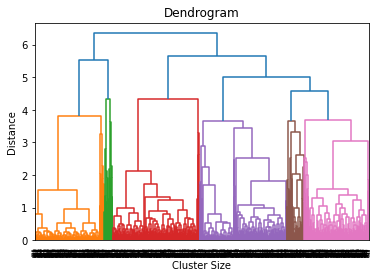

In [11]:
dendrogram(z, leaf_rotation = 90, leaf_font_size = 5.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

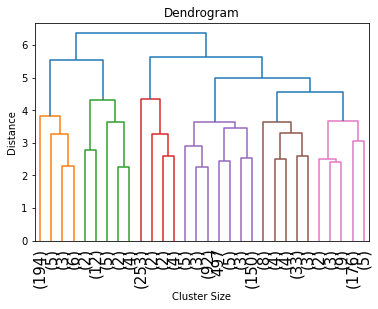

In [18]:
dendrogram(z, truncate_mode = 'lastp', p = 30, leaf_rotation = 90, leaf_font_size = 15.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

### Agglomerative Hierarchical Clustering

In [19]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

In [20]:
hclust = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')

In [21]:
hclust.fit(telco_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=5,
                        pooling_func='deprecated')

### Grouping the Data

In [22]:
telco['Groups'] = hclust.labels_

In [23]:
telco.head(10)

,Calls,Intern,Text,Data,Age,Groups
0,1.12,0.19,23.92,0.18,60,3
1,1.08,0.22,17.76,0.23,54,3
2,3.54,0.26,289.79,1.99,34,4
3,1.09,0.21,19.15,0.21,61,3
4,1.04,0.24,20.33,0.20,56,3
5,5.59,0.88,19.23,2.02,41,0
6,1.19,0.19,17.94,0.24,71,3
7,3.07,0.34,359.49,2.06,30,4
8,5.34,0.99,295.47,0.97,41,0
9,2.43,0.09,17.57,0.46,33,4


### Checking the Aggreagate of the Groups

In [24]:
telco.groupby(['Groups']).mean()

,Calls,Intern,Text,Data,Age
Groups,,,,,
0,4.472227,1.010486,82.832146,2.009190,43.149798
1,4.700400,0.432400,376.350800,1.545600,46.120000
2,1.763410,0.131456,507.732146,3.731073,19.003831
3,1.068846,0.238702,45.874567,0.355288,60.610577
4,2.800039,0.233514,204.993282,1.475405,32.424710


### Inferences:
- Group 0: Age around 43. Use faily good amount of data and uses a lot of calls and international calls
- Group 1: Age around 46. Uses text and calls a lot.
- Group 2: Age around 19. Heavy users of text and data.
- Group 3: Age around 60. Uses mostly call, else usage is very less.
- Group 4: Age around 32: Uses faily good amount of calls, text and data.


### K-Means Clustering

In [25]:
from sklearn.cluster import KMeans

In [26]:
km = KMeans(n_clusters = 5, n_init= 40)

In [ ]:
#Fit the Kmeans Model
km.fit(telco_scaled)